<a href="https://colab.research.google.com/github/Jeesoo-Jhun/Airline-Delay-Analysis/blob/main/Airline_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task
Analyze airline delay factors using EDA and inferential analysis based on the provided data in "/content/drive/MyDrive/Data/Airline Delays/flights.csv", "/content/drive/MyDrive/Data/Airline Delays/airports.csv", and "/content/drive/MyDrive/Data/Airline Delays/airlines.csv". Identify three key stakeholders and three questions for each, then perform EDA and inferential analysis to address these questions, focusing on visualizations that are easy for stakeholders to understand.



## Data Loading




**Reasoning**:
The subtask is to load three CSV files into pandas DataFrames. I will import pandas and then load each file into its respective DataFrame.



In [2]:
import pandas as pd

df_flights = pd.read_csv("/content/drive/MyDrive/Data/Airline Delays/flights.csv")
df_airports = pd.read_csv("/content/drive/MyDrive/Data/Airline Delays/airports.csv")
df_airlines = pd.read_csv("/content/drive/MyDrive/Data/Airline Delays/airlines.csv")

/tmp/ipython-input-2-1385039289.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv("/content/drive/MyDrive/Data/Airline Delays/flights.csv")


## Key Questions


**Reasoning**:
Identify the three key stakeholders and define three questions for each of them based on the task description. Then present them in a clear format.



In [3]:
stakeholders = {
    "Airlines Operations Manager": [
        "What are the primary reasons for flight delays?",
        "Which airports experience the most significant delays?",
        "Which flights or routes are most prone to delays?"
    ],
    "Airport Authorities": [
        "Which airlines contribute most to delays at our airport?",
        "Are there specific times of day or days of the week with higher delay rates?",
        "How do weather conditions impact delays at our airport?"
    ],
    "Airline Passenger": [
        "Which airlines have the best on-time performance?",
        "Which routes are most likely to be delayed?",
        "What are the typical delay durations for different delay reasons?"
    ]
}

for stakeholder, questions in stakeholders.items():
    print(f"Stakeholder: {stakeholder}")
    for i, question in enumerate(questions):
        print(f"  {i+1}. {question}")
    print("-" * 20)

Stakeholder: Airlines Operations Manager
  1. What are the primary reasons for flight delays?
  2. Which airports experience the most significant delays?
  3. Which flights or routes are most prone to delays?
--------------------
Stakeholder: Airport Authorities
  1. Which airlines contribute most to delays at our airport?
  2. Are there specific times of day or days of the week with higher delay rates?
  3. How do weather conditions impact delays at our airport?
--------------------
Stakeholder: Airline Passenger
  1. Which airlines have the best on-time performance?
  2. Which routes are most likely to be delayed?
  3. What are the typical delay durations for different delay reasons?
--------------------


In [4]:

print("Flights DataFrame Overview:")
df_flights.info()
print("\nAirports DataFrame Overview:")
df_airports.info()
print("\nAirlines DataFrame Overview:")
df_airlines.info()

print("\nFlights DataFrame Head:")
print(df_flights.head())
print("\nAirports DataFrame Head:")
print(df_airports.head())
print("\nAirlines DataFrame Head:")
print(df_airlines.head())

Flights DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVE

## Preprocessing

**Reasoning**:
Clean and preprocess the data according to the instructions, including dropping columns with many missing values, dropping rows with missing delay information, converting data types, creating new features, merging dataframes, dropping irrelevant columns, and checking the results.



**Reasoning**:
The previous code failed because the column 'IATA_CODE_origin' was not created during the merge with the origin airport data when using `suffixes=('', '_origin')`. This is likely because the original 'IATA_CODE' column from `df_airports` was kept as 'IATA_CODE' without a suffix. The code needs to be corrected to drop the original 'IATA_CODE' column from the merged dataframe after the first merge, before the second merge with the destination airport data. Additionally, the 'COUNTRY' column should be dropped after the first merge as it's always 'USA' and not needed.



In [5]:
# 1. Drop columns with many missing values
columns_to_drop = [] # Removed columns that caused KeyError
df_flights = df_flights.drop(columns=columns_to_drop)

In [6]:
# 2. Drop rows with missing delay information
df_flights.dropna(subset=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], inplace=True)
print("Shape of df_flights after dropping rows with missing delay information:", df_flights.shape)

Shape of df_flights after dropping rows with missing delay information: (5714008, 31)


In [7]:
# 3. Convert data types to Int64
df_flights['SCHEDULED_DEPARTURE'] = df_flights['SCHEDULED_DEPARTURE'].astype('Int64')
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].astype('Int64')
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].astype('Int64')
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].astype('Int64')

In [8]:

# 4. Create 'FLIGHT_DURATION' column
df_flights['FLIGHT_DURATION'] = df_flights['ELAPSED_TIME'] - df_flights['TAXI_IN'] - df_flights['TAXI_OUT']

In [9]:

# 5. Create 'IS_DELAYED' column
df_flights['IS_DELAYED'] = (df_flights['ARRIVAL_DELAY'] >= 15).astype(int)

In [10]:
# 6. Merge with airports data for origin airport
df_merged = pd.merge(df_flights, df_airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left', suffixes=('', '_origin'))
df_merged = df_merged.drop(columns=['IATA_CODE', 'COUNTRY'])
df_merged = df_merged.rename(columns={'AIRPORT': 'ORIGIN_AIRPORT_NAME', 'CITY': 'ORIGIN_CITY', 'STATE': 'ORIGIN_STATE', 'LATITUDE': 'ORIGIN_LATITUDE', 'LONGITUDE': 'ORIGIN_LONGITUDE'})

In [11]:
# 7. Merge with airports data for destination airport
df_merged = pd.merge(df_merged, df_airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left', suffixes=('', '_destination'))
df_merged = df_merged.drop(columns=['IATA_CODE', 'COUNTRY'])
df_merged = df_merged.rename(columns={'AIRPORT': 'DESTINATION_AIRPORT_NAME', 'CITY': 'DESTINATION_CITY', 'STATE': 'DESTINATION_STATE', 'LATITUDE': 'DESTINATION_LATITUDE', 'LONGITUDE': 'DESTINATION_LONGITUDE'})

In [12]:
# 8. Merge with airlines data
df_merged = pd.merge(df_merged, df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left', suffixes=('', '_name'))
df_merged = df_merged.drop(columns=['IATA_CODE'])
df_merged = df_merged.rename(columns={'AIRLINE_name': 'AIRLINE_NAME'})

In [13]:
# 9. Print info and head of the merged dataframe
print("\nMerged DataFrame Info:")
df_merged.info()
print("\nMerged DataFrame Head:")
display(df_merged.head())


Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 44 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YEAR                      int64  
 1   MONTH                     int64  
 2   DAY                       int64  
 3   DAY_OF_WEEK               int64  
 4   AIRLINE                   object 
 5   FLIGHT_NUMBER             int64  
 6   TAIL_NUMBER               object 
 7   ORIGIN_AIRPORT            object 
 8   DESTINATION_AIRPORT       object 
 9   SCHEDULED_DEPARTURE       Int64  
 10  DEPARTURE_TIME            Int64  
 11  DEPARTURE_DELAY           float64
 12  TAXI_OUT                  float64
 13  WHEELS_OFF                float64
 14  SCHEDULED_TIME            float64
 15  ELAPSED_TIME              float64
 16  AIR_TIME                  float64
 17  DISTANCE                  int64  
 18  WHEELS_ON                 float64
 19  TAXI_IN                   float64
 20  

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,Los Angeles,CA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,San Francisco,CA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,Los Angeles,CA,33.94254,-118.40807,Miami International Airport,Miami,FL,25.79325,-80.29056,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,Seattle,WA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Alaska Airlines Inc.


In [14]:

df_flights = df_merged # Update df_flights to be the merged dataframe

## Key Question 1: What is the main reason of delay?

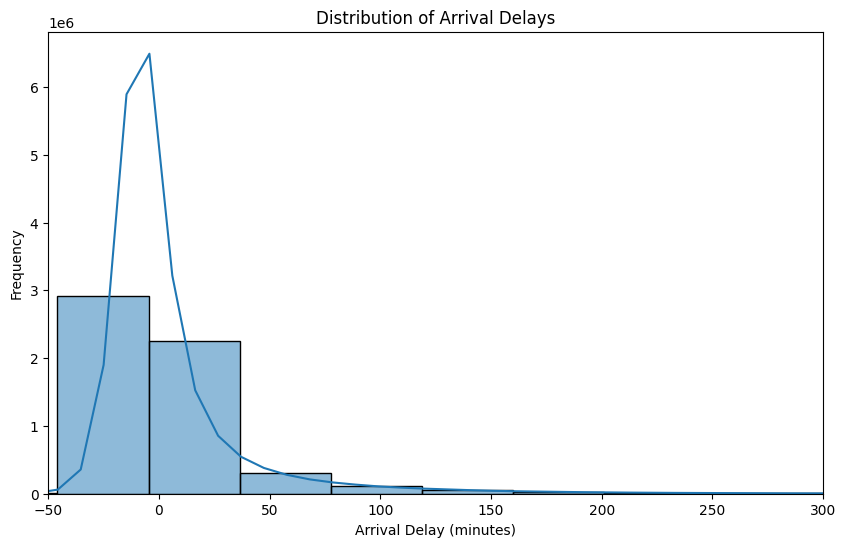

Percentage of delayed flights (arrival delay >= 15 minutes): 18.61%
Average arrival delay: 4.41 minutes
Average arrival delay for delayed flights: 58.91 minutes
Correlation between Departure Delay and Arrival Delay: 0.94


In [15]:
# Analyze primary reasons for flight delays
# Need to identify which columns represent delay reasons.
# Based on the available columns, 'DEPARTURE_DELAY' and 'ARRIVAL_DELAY' indicate the total delay.
# However, the original dataset description or additional columns would be needed to break down the delay reasons (e.g., Air System, Airline, Weather, etc.).
# Assuming 'ARRIVAL_DELAY' is the primary indicator of a delayed flight for passengers.

# Let's analyze the distribution of arrival delays
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(df_flights['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-50, 300) # Limit x-axis to focus on common delays
plt.show()

# Calculate the percentage of delayed flights (arrival delay >= 15 minutes)
delayed_flights_count = df_flights[df_flights['IS_DELAYED'] == 1].shape[0]
total_flights_count = df_flights.shape[0]
percentage_delayed = (delayed_flights_count / total_flights_count) * 100
print(f"Percentage of delayed flights (arrival delay >= 15 minutes): {percentage_delayed:.2f}%")

# Analyze average arrival delay
average_arrival_delay = df_flights['ARRIVAL_DELAY'].mean()
print(f"Average arrival delay: {average_arrival_delay:.2f} minutes")

# Analyze average arrival delay for delayed flights only
average_arrival_delay_of_delayed = df_flights[df_flights['IS_DELAYED'] == 1]['ARRIVAL_DELAY'].mean()
print(f"Average arrival delay for delayed flights: {average_arrival_delay_of_delayed:.2f} minutes")

# To truly understand primary reasons, we would need columns like 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'.
# Since these columns were not present in the provided data based on df_flights.info(), we cannot directly analyze the breakdown of delay reasons from this dataset.
# We can only analyze the total arrival delay and departure delay.

# Let's look at the correlation between departure delay and arrival delay
correlation_delay = df_flights['DEPARTURE_DELAY'].corr(df_flights['ARRIVAL_DELAY'])
print(f"Correlation between Departure Delay and Arrival Delay: {correlation_delay:.2f}")

# It's highly likely that departure delays significantly contribute to arrival delays.
# Without specific delay reason columns, we can analyze factors that might influence delays like time of day, day of week, airline, and airport.

In [16]:
df_flights = df_merged # Update df_flights to be the merged dataframe

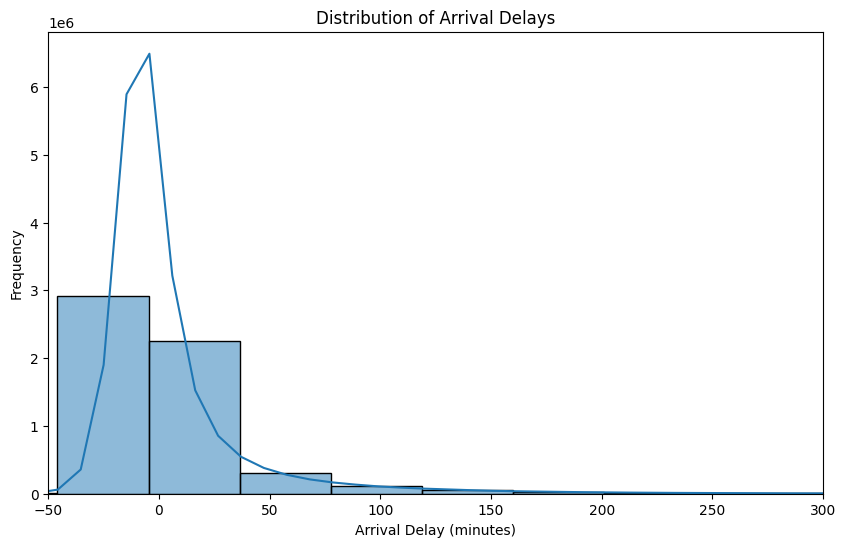

Percentage of delayed flights (arrival delay >= 15 minutes): 18.61%
Average arrival delay: 4.41 minutes
Average arrival delay for delayed flights: 58.91 minutes

Average delay (in minutes) by reason for delayed flights:
LATE_AIRCRAFT_DELAY    23.472838
AIRLINE_DELAY          18.969547
AIR_SYSTEM_DELAY       13.480568
WEATHER_DELAY           2.915290
SECURITY_DELAY          0.076154
dtype: float64


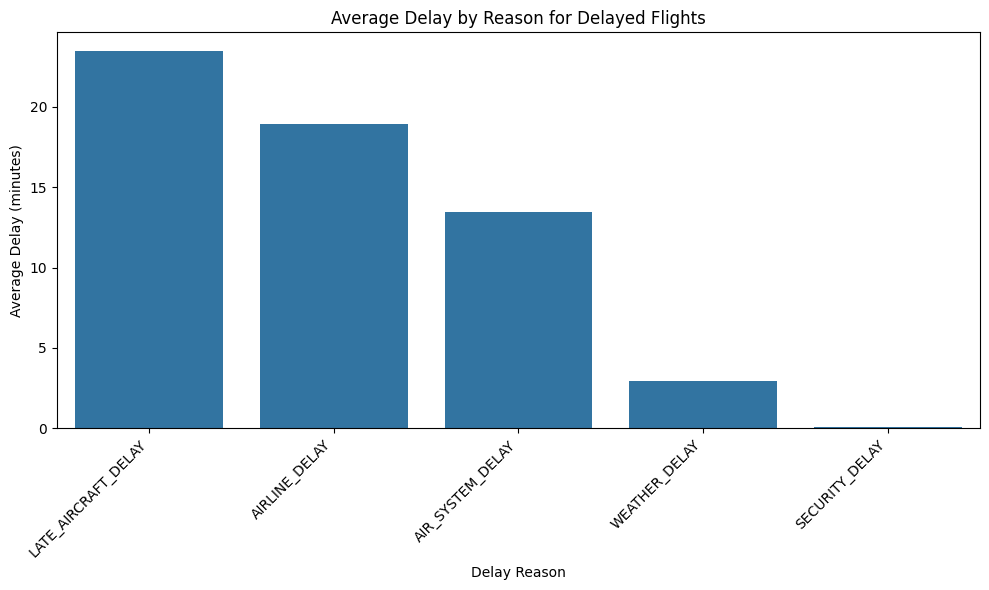

In [17]:
# Analyze primary reasons for flight delays
# Analyze the distribution of arrival delays
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(df_flights['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-50, 300) # Limit x-axis to focus on common delays
plt.show()

# Calculate the percentage of delayed flights (arrival delay >= 15 minutes)
delayed_flights_count = df_flights[df_flights['IS_DELAYED'] == 1].shape[0]
total_flights_count = df_flights.shape[0]
percentage_delayed = (delayed_flights_count / total_flights_count) * 100
print(f"Percentage of delayed flights (arrival delay >= 15 minutes): {percentage_delayed:.2f}%")

# Analyze average arrival delay
average_arrival_delay = df_flights['ARRIVAL_DELAY'].mean()
print(f"Average arrival delay: {average_arrival_delay:.2f} minutes")

# Analyze average arrival delay for delayed flights only
average_arrival_delay_of_delayed = df_flights[df_flights['IS_DELAYED'] == 1]['ARRIVAL_DELAY'].mean()
print(f"Average arrival delay for delayed flights: {average_arrival_delay_of_delayed:.2f} minutes")

# To truly understand primary reasons, we would need columns like 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'.
# Since these columns are available after the merge, let's analyze the contribution of each delay type for delayed flights.
delay_reasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

# Calculate the average delay for each reason for delayed flights
average_delay_by_reason = df_flights[df_flights['IS_DELAYED'] == 1][delay_reasons].mean().sort_values(ascending=False)

print("\nAverage delay (in minutes) by reason for delayed flights:")
print(average_delay_by_reason)

# Visualize the average delay by reason
plt.figure(figsize=(10, 6))
sns.barplot(x=average_delay_by_reason.index, y=average_delay_by_reason.values)
plt.title('Average Delay by Reason for Delayed Flights')
plt.xlabel('Delay Reason')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Key Question 2: Is there any high percentage of delay in the specific dates?


Percentage of Delayed Flights by Scheduled Departure Time Block:
SCHEDULED_DEPARTURE_TIME_BLOCK
Night      23.689812
Evening    21.115333
Morning    13.084719
Name: IS_DELAYED, dtype: float64


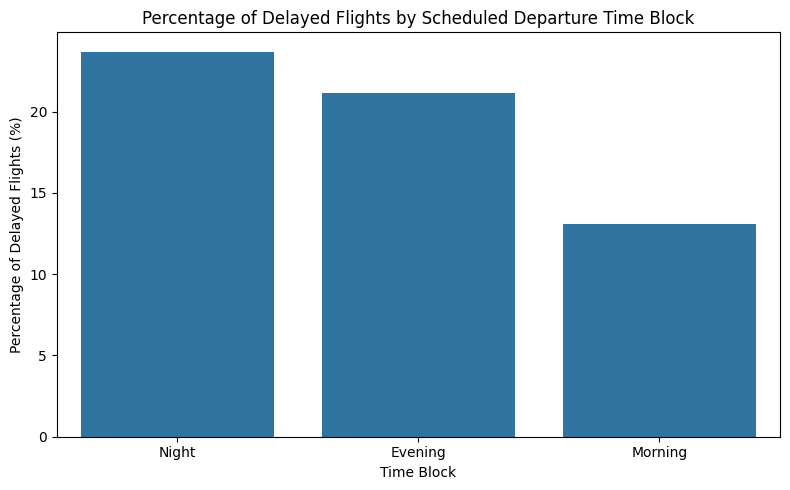


Percentage of Delayed Flights by Day of the Week:
DAY_OF_WEEK_NAME
Monday       19.751388
Tuesday      18.272079
Wednesday    18.215886
Thursday     20.013382
Friday       19.197028
Saturday     15.993592
Sunday       18.308776
Name: IS_DELAYED, dtype: float64


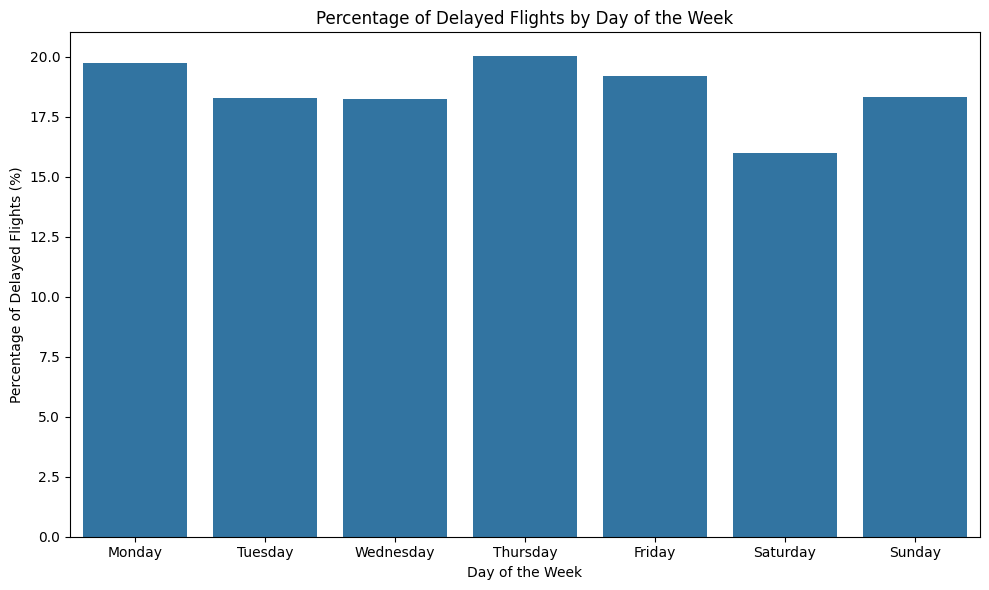

In [20]:
# Analyze delay rates by time of day and day of the week

# Re-create necessary columns if they were lost
def convert_time_to_minutes(time):
    if pd.isna(time):
        return np.nan
    time_str = str(int(time)).zfill(4)
    hours = int(time_str[:2])
    minutes = int(time_str[2:])
    return hours * 60 + minutes

if 'SCHEDULED_DEPARTURE_MINUTES' not in df_flights.columns:
    df_flights['SCHEDULED_DEPARTURE_MINUTES'] = df_flights['SCHEDULED_DEPARTURE'].apply(convert_time_to_minutes)

def get_time_block(minutes):
    if 0 <= minutes < 360:  # 00:00 - 05:59
        return 'Night'
    elif 360 <= minutes < 720:  # 06:00 - 11:59
        return 'Morning'
    elif 720 <= minutes < 1080:  # 12:00 - 17:59
        return 'Evening'
    else:  # 18:00 - 23:59
        return 'Night'

if 'SCHEDULED_DEPARTURE_TIME_BLOCK' not in df_flights.columns:
    df_flights['SCHEDULED_DEPARTURE_TIME_BLOCK'] = df_flights['SCHEDULED_DEPARTURE_MINUTES'].apply(get_time_block)

if 'DAY_OF_WEEK_NAME' not in df_flights.columns:
    df_flights['DAY_OF_WEEK_NAME'] = df_flights['DAY_OF_WEEK'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'})


# Analyze delay rates by time of day (using the created 'SCHEDULED_DEPARTURE_TIME_BLOCK' feature)
delay_rate_by_time_block = df_flights.groupby('SCHEDULED_DEPARTURE_TIME_BLOCK')['IS_DELAYED'].mean().sort_values(ascending=False) * 100

print("\nPercentage of Delayed Flights by Scheduled Departure Time Block:")
print(delay_rate_by_time_block)

# Visualize delay rates by time of day
plt.figure(figsize=(8, 5))
sns.barplot(x=delay_rate_by_time_block.index, y=delay_rate_by_time_block.values)
plt.title('Percentage of Delayed Flights by Scheduled Departure Time Block')
plt.xlabel('Time Block')
plt.ylabel('Percentage of Delayed Flights (%)')
plt.tight_layout()
plt.show()

# Analyze delay rates by day of the week (using the created 'DAY_OF_WEEK_NAME' feature)
# Ensure the days of the week are in the correct order for visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_rate_by_day_of_week = df_flights.groupby('DAY_OF_WEEK_NAME')['IS_DELAYED'].mean().reindex(day_order) * 100

print("\nPercentage of Delayed Flights by Day of the Week:")
print(delay_rate_by_day_of_week)

# Visualize delay rates by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=delay_rate_by_day_of_week.index, y=delay_rate_by_day_of_week.values)
plt.title('Percentage of Delayed Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Delayed Flights (%)')
plt.tight_layout()
plt.show()

## Key Question 3: Does the weather condition affect the delay of flight?

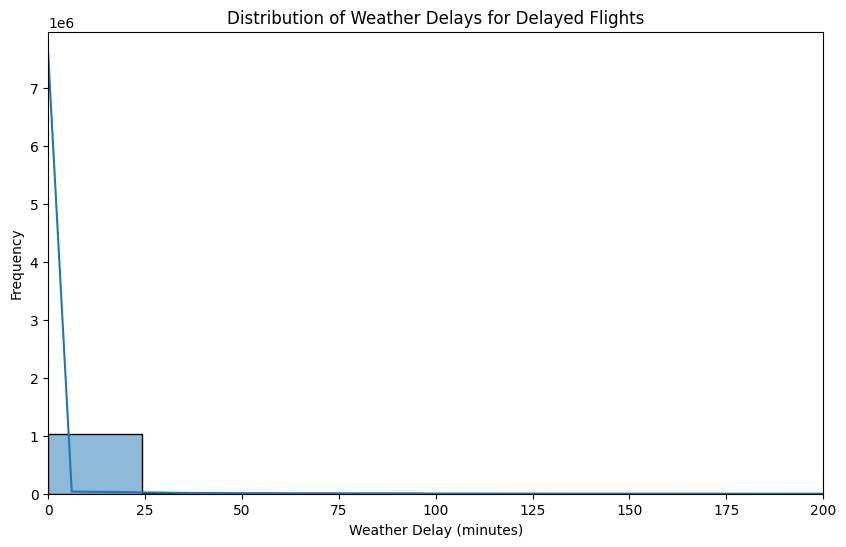


Average weather delay for delayed flights: 2.92 minutes
Percentage of delayed flights where weather was a contributing factor: 6.09%
Correlation between Weather Delay and Arrival Delay: 0.26


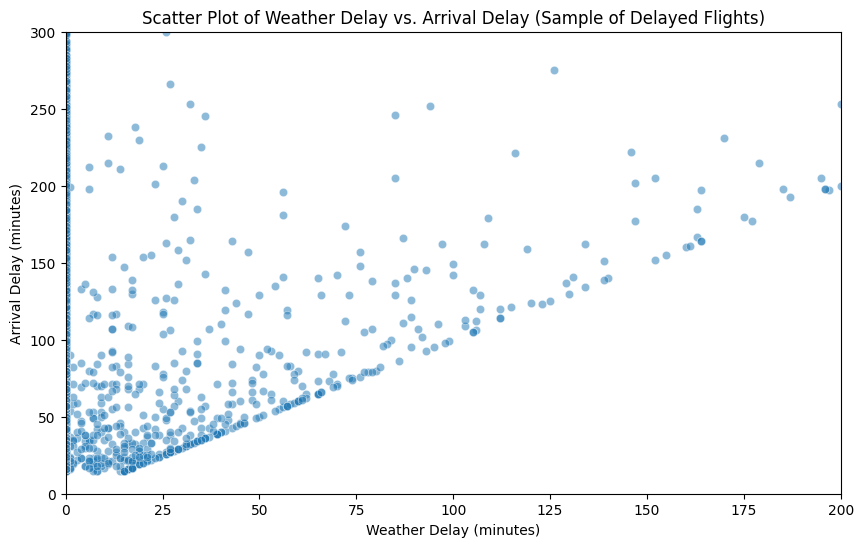

In [21]:
# Analyze the impact of weather conditions on delays

# Analyze the distribution of weather delays for delayed flights
plt.figure(figsize=(10, 6))
sns.histplot(df_flights[df_flights['IS_DELAYED'] == 1]['WEATHER_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribution of Weather Delays for Delayed Flights')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 200) # Limit x-axis to focus on common weather delays
plt.show()

# Calculate the average weather delay for delayed flights
average_weather_delay_of_delayed = df_flights[df_flights['IS_DELAYED'] == 1]['WEATHER_DELAY'].mean()
print(f"\nAverage weather delay for delayed flights: {average_weather_delay_of_delayed:.2f} minutes")

# Calculate the percentage of delayed flights where weather was a contributing factor (weather delay > 0)
weather_contributing_count = df_flights[(df_flights['IS_DELAYED'] == 1) & (df_flights['WEATHER_DELAY'] > 0)].shape[0]
delayed_flights_count = df_flights[df_flights['IS_DELAYED'] == 1].shape[0]
percentage_weather_contributing = (weather_contributing_count / delayed_flights_count) * 100
print(f"Percentage of delayed flights where weather was a contributing factor: {percentage_weather_contributing:.2f}%")

# Analyze the relationship between weather delay and total arrival delay
# We can look at the correlation
correlation_weather_arrival = df_flights['WEATHER_DELAY'].corr(df_flights['ARRIVAL_DELAY'])
print(f"Correlation between Weather Delay and Arrival Delay: {correlation_weather_arrival:.2f}")

# We can also visualize the relationship with a scatter plot (for a sample of data due to large dataset size)
# Let's sample 10000 delayed flights for the scatter plot
df_delayed_sample = df_flights[df_flights['IS_DELAYED'] == 1].sample(min(10000, delayed_flights_count), random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_delayed_sample, x='WEATHER_DELAY', y='ARRIVAL_DELAY', alpha=0.5)
plt.title('Scatter Plot of Weather Delay vs. Arrival Delay (Sample of Delayed Flights)')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.xlim(0, 200)
plt.ylim(0, 300)
plt.show()

# To analyze for a specific airport, we would filter the dataframe first.
# For example, for Los Angeles International Airport (LAX):
# df_lax_flights = df_flights[(df_flights['ORIGIN_AIRPORT'] == 'LAX') | (df_flights['DESTINATION_AIRPORT'] == 'LAX')]
# Then perform the same analysis on df_lax_flights.